# Example: Train sizing
-----------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

### Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  MelbourneAirport     18.0     26.9      21.4          7.0       8.9   
1          Adelaide     17.2     23.4       0.0          NaN       NaN   
2            Cairns     18.6     24.6       7.4          3.0       6.1   
3          Portland     13.6     16.8       4.2          1.2       0.0   
4           Walpole     16.4     19.9       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0         SSE           41.0          W        SSE  ...         95.0   
1           S           41.0          S        WSW  ...         59.0   
2         SSE           54.0        SSE         SE  ...         78.0   
3         ESE           39.0        ESE        ESE  ...         76.0   
4          SE           44.0         SE         SE  ...         78.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         54.0       1019.5       1017.0       8.0       5.0     18.5   
1         36.0       1015.7       1015.7       NaN       NaN     17.7   
2         57.0       1018.7       1016.6       3.0       3.0     20.8   
3         74.0       1021.4       1020.5       7.0       8.0     15.6   
4         70.0       1019.4       1018.9       NaN       NaN     17.4   

   Temp3pm  RainToday  RainTomorrow  
0     26.0        Yes             0  
1     21.9         No             0  
2     24.1        Yes             0  
3     16.0        Yes             1  
4     18.1         No             0  

[5 rows x 22 columns]

## Run the pipeline

In [3]:
# Initialize atom and prepare the data
atom = ATOMClassifier(X, verbose=2, random_state=1)
atom.clean()
atom.impute(strat_num="median", strat_cat="most_frequent", max_nan_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (142193, 22)
Train set size: 113755
Test set size: 28438
-------------------------------------
Memory: 61.69 MB
Scaled: False
Missing values: 316559 (10.1%)
Categorical features: 5 (23.8%)
Duplicate samples: 45 (0.0%)

Fitting Cleaner...
Cleaning the data...
Fitting Imputer...
Imputing missing values...
 --> Dropping 161 samples for containing more than 16 missing values.
 --> Imputing 481 missing values with median (12.0) in feature MinTemp.
 --> Imputing 265 missing values with median (22.6) in feature MaxTemp.
 --> Imputing 1354 missing values with median (0.0) in feature Rainfall.
 --> Imputing 60682 missing values with median (4.8) in feature Evaporation.
 --> Imputing 67659 missing values with median (8.4) in feature Sunshine.
 --> Imputing 9187 missing values with most_frequent (W) in feature WindGustDir.
 --> Imputing 9127 missing values with med

In [4]:
# Analyze the impact of the training set's size on a LightGBM model
atom.train_sizing("LGB", train_sizes=10, n_bootstrap=5)


Training ========================= >>
Metric: f1


Run: 0 =========================== >>
Models: LGB01
Size of training set: 11362 (10%)
Size of test set: 28408


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> f1: 0.795
Test evaluation --> f1: 0.6169
Time elapsed: 2.702s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.6025 ± 0.0021
Time elapsed: 2.367s
-------------------------------------------------
Total time: 5.069s


Final results ==================== >>
Total time: 5.072s
-------------------------------------
LightGBM --> f1: 0.6025 ± 0.0021 ~


Run: 1 =========================== >>
Models: LGB02
Size of training set: 22724 (20%)
Size of test set: 28408


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> f1: 0.711
Test evaluation --> f1: 0.6172
Time elapsed: 3.361s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.606 ± 0.0021
Time elapsed: 2.924s


## Analyze the results

In [5]:
# The results are now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the fraction as well (without the dot)
atom.results

score_train  score_test  time_fit  score_bootstrap  \
frac model                                                       
0.1  LGB01       0.7950      0.6169  2.701927         0.602473   
0.2  LGB02       0.7110      0.6172  3.361056         0.605984   
0.3  LGB03       0.6844      0.6205  4.114851         0.613633   
0.4  LGB04       0.6788      0.6246  4.704423         0.620894   
0.5  LGB05       0.6694      0.6256  5.332624         0.623075   
0.6  LGB06       0.6623      0.6270  6.176526         0.622287   
0.7  LGB07       0.6609      0.6307  6.786634         0.625412   
0.8  LGB08       0.6588      0.6316  7.660243         0.625519   
0.9  LGB09       0.6601      0.6318  8.433411         0.625334   
1.0  LGB10       0.6558      0.6310  8.937261         0.625840   

            time_bootstrap       time  
frac model                             
0.1  LGB01        2.366629   5.068556  
0.2  LGB02        2.923961   6.285017  
0.3  LGB03        3.573816   7.688667  
0.4  LGB04        4.312111   9.016534  
0.5  LGB05        4.956064  10.288688  
0.6  LGB06        5.432179  11.608705  
0.7  LGB07        6.138183  12.924817  
0.8  LGB08        7.141488  14.801731  
0.9  LGB09        7.352633  15.786044  
1.0  LGB10        8.158222  17.095483

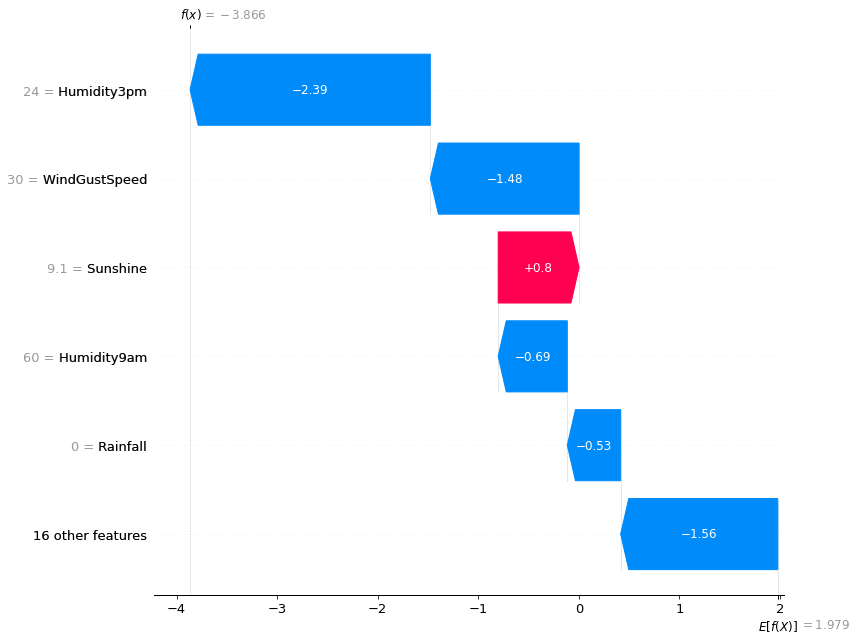

In [6]:
# Every model can be accessed through its name
atom.lgb05.plot_shap_waterfall(show=6)

In [7]:
# Plot the train sizing's results
atom.plot_learning_curve()